In [31]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Deep Learning/Capstone Project/creditcard.csv')

In [32]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [34]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

Class Distribution:
 Class
0    284315
1       492
Name: count, dtype: int64

Percentage of fraudulent transactions: 0.173%


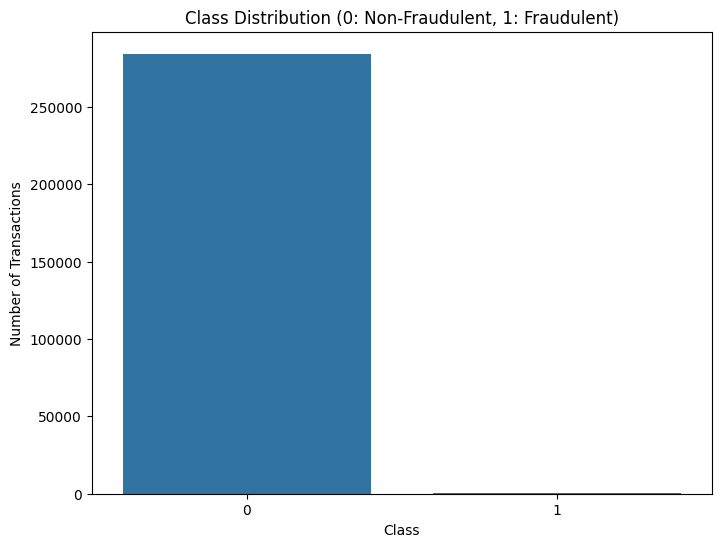


Conclusion of Balance Check: The dataset is extremely imbalanced.


In [35]:
# --- Balance Check ---
class_distribution = df['Class'].value_counts()
print("Class Distribution:\n", class_distribution)

# Calculate the percentage of fraud cases
fraud_percentage = (class_distribution[1] / class_distribution.sum()) * 100
print(f"\nPercentage of fraudulent transactions: {fraud_percentage:.3f}%")

# Visualize the imbalance
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution (0: Non-Fraudulent, 1: Fraudulent)')
plt.xlabel('Class')
plt.ylabel('Number of Transactions')
plt.show()

print("\nConclusion of Balance Check: The dataset is extremely imbalanced.")

In [36]:
# --- Step 3: Data Preprocessing ---
# This new block replaces the old Step 3 entirely.

# Make sure to import joblib and train_test_split at the top of your script
from sklearn.model_selection import train_test_split
import joblib

# Create SEPARATE scaler objects for Amount and Time
amount_scaler = StandardScaler()
time_scaler = StandardScaler()

# Fit and transform each column with its OWN scaler
df['scaled_Amount'] = amount_scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df['scaled_Time'] = time_scaler.fit_transform(df['Time'].values.reshape(-1, 1))

# --- ADD THIS PART ---
# Save the CORRECT fitted scaler objects to their respective files
joblib.dump(amount_scaler, 'amount_scaler.joblib')
print("Fitted 'amount_scaler' saved to amount_scaler.joblib")
joblib.dump(time_scaler, 'time_scaler.joblib')
print("Fitted 'time_scaler' saved to time_scaler.joblib")
# --- END OF ADDED PART ---

# Drop the original 'Time' and 'Amount' columns
df.drop(['Time', 'Amount'], axis=1, inplace=True)

# Reorder columns to have 'Class' at the end
v_features = [col for col in df.columns if col.startswith('V')]
df = df[v_features + ['scaled_Amount', 'scaled_Time', 'Class']]

print("\nPreprocessed Data Head:\n", df.head())

# Define features (X) and target (y)
X = df.drop('Class', axis=1)
y = df['Class']

# Split into training and testing sets (80% train, 20% test)
# Crucially, we split BEFORE resampling to avoid data leakage
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nTraining set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Fitted 'amount_scaler' saved to amount_scaler.joblib
Fitted 'time_scaler' saved to time_scaler.joblib

Preprocessed Data Head:
          V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V22       V23       V24       V25  \
0  0.098698  0.363787  0.090794  ...  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425 -0.166974  ... -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  0.207643  ...  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024 -0.054952  ...  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739


Class distribution before SMOTE:
 Class
0    227451
1       394
Name: count, dtype: int64

Class distribution after SMOTE:
 Class
0    227451
1    227451
Name: count, dtype: int64


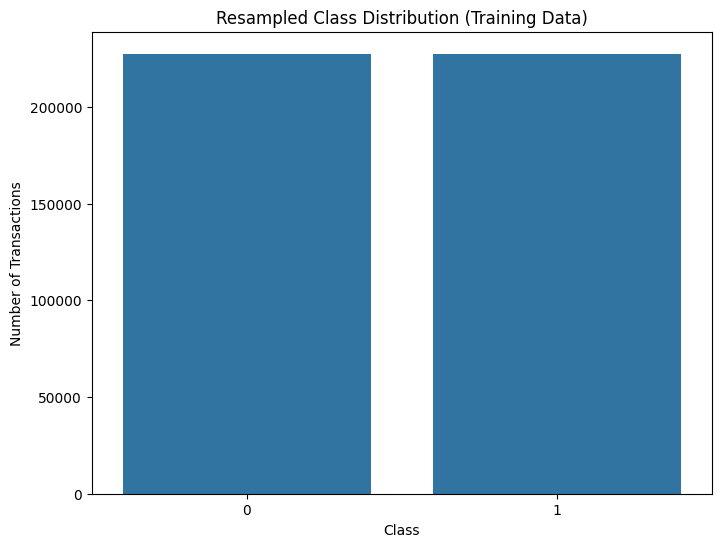

In [20]:
# --- Handling Imbalance using SMOTE ---
print("\nClass distribution before SMOTE:\n", y_train.value_counts())

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("\nClass distribution after SMOTE:\n", y_train_resampled.value_counts())

# Visualize the resampled data distribution
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train_resampled)
plt.title('Resampled Class Distribution (Training Data)')
plt.xlabel('Class')
plt.ylabel('Number of Transactions')
plt.show()

In [21]:
# --- Build the Neural Network Model ---
model = Sequential([
    # Input Layer
    Dense(64, activation='relu', input_shape=(X_train_resampled.shape[1],)),
    BatchNormalization(),
    Dropout(0.5),

    # Hidden Layer 1
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    # Hidden Layer 2
    Dense(16, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    # Output Layer
    Dense(1, activation='sigmoid') # Sigmoid for binary classification
])

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=[
        'AUC', # Area Under the ROC Curve
        'Precision',
        'Recall'
    ]
)

# Display the model summary
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,057 (19.75 KB)

 Trainable params: 4,833 (18.88 KB)

 Non-trainable params: 224 (896.00 B)

In [22]:
# --- Train the Model ---

# Define callbacks
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5, # Stop if validation loss doesn't improve for 5 epochs
    restore_best_weights=True # Restore model weights from the epoch with the best value
)

model_checkpoint = ModelCheckpoint(
    'best_fraud_model.h5', # File path to save the model
    save_best_only=True,
    monitor='val_auc', # Save the model with the best validation AUC
    mode='max'
)

# Train the model
# Note: We use the resampled data for training and the original, imbalanced test set for validation
history = model.fit(
    X_train_resampled,
    y_train_resampled,
    epochs=50, # A high number of epochs is fine due to EarlyStopping
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping, model_checkpoint],
    verbose=1
)

Epoch 1/50
3554/3554 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9625 - Precision: 0.9219 - Recall: 0.9029 - loss: 0.2162

/usr/local/lib/python3.12/dist-packages/keras/src/callbacks/model_checkpoint.py:302: UserWarning: Can save best model only with val_auc available.
  if self._should_save_model(epoch, batch, logs, filepath):


3554/3554 ━━━━━━━━━━━━━━━━━━━━ 24s 5ms/step - AUC: 0.9625 - Precision: 0.9219 - Recall: 0.9029 - loss: 0.2162 - val_AUC: 0.9595 - val_Precision: 0.1719 - val_Recall: 0.8878 - val_loss: 0.0231
Epoch 2/50
3553/3554 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9969 - Precision: 0.9800 - Recall: 0.9858 - loss: 0.0552

3554/3554 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - AUC: 0.9969 - Precision: 0.9800 - Recall: 0.9858 - loss: 0.0552 - val_AUC: 0.9474 - val_Precision: 0.1867 - val_Recall: 0.8878 - val_loss: 0.0215
Epoch 3/50
3550/3554 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9981 - Precision: 0.9857 - Recall: 0.9929 - loss: 0.0378

3554/3554 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - AUC: 0.9981 - Precision: 0.9857 - Recall: 0.9929 - loss: 0.0378 - val_AUC: 0.9430 - val_Precision: 0.2566 - val_Recall: 0.8878 - val_loss: 0.0155
Epoch 4/50
3550/3554 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9984 - Precision: 0.9882 - Recall: 0.9946 - loss: 0.0316

3554/3554 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - AUC: 0.9984 - Precision: 0.9882 - Recall: 0.9946 - loss: 0.0316 - val_AUC: 0.9430 - val_Precision: 0.3014 - val_Recall: 0.8673 - val_loss: 0.0125
Epoch 5/50
3544/3554 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9987 - Precision: 0.9896 - Recall: 0.9955 - loss: 0.0275

3554/3554 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - AUC: 0.9987 - Precision: 0.9896 - Recall: 0.9955 - loss: 0.0275 - val_AUC: 0.9532 - val_Precision: 0.3139 - val_Recall: 0.8776 - val_loss: 0.0134
Epoch 6/50
3554/3554 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9987 - Precision: 0.9907 - Recall: 0.9960 - loss: 0.0260

3554/3554 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - AUC: 0.9987 - Precision: 0.9907 - Recall: 0.9960 - loss: 0.0260 - val_AUC: 0.9432 - val_Precision: 0.4078 - val_Recall: 0.8571 - val_loss: 0.0097
Epoch 7/50
3554/3554 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9989 - Precision: 0.9911 - Recall: 0.9964 - loss: 0.0237

3554/3554 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - AUC: 0.9989 - Precision: 0.9911 - Recall: 0.9964 - loss: 0.0237 - val_AUC: 0.9482 - val_Precision: 0.4375 - val_Recall: 0.8571 - val_loss: 0.0101
Epoch 8/50
3547/3554 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9989 - Precision: 0.9921 - Recall: 0.9970 - loss: 0.0219

3554/3554 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - AUC: 0.9989 - Precision: 0.9921 - Recall: 0.9970 - loss: 0.0219 - val_AUC: 0.9432 - val_Precision: 0.4404 - val_Recall: 0.8673 - val_loss: 0.0098
Epoch 9/50
3544/3554 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9990 - Precision: 0.9920 - Recall: 0.9968 - loss: 0.0214

3554/3554 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - AUC: 0.9990 - Precision: 0.9920 - Recall: 0.9968 - loss: 0.0213 - val_AUC: 0.9432 - val_Precision: 0.4109 - val_Recall: 0.8469 - val_loss: 0.0095
Epoch 10/50
3548/3554 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9990 - Precision: 0.9926 - Recall: 0.9973 - loss: 0.0204

3554/3554 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - AUC: 0.9990 - Precision: 0.9926 - Recall: 0.9973 - loss: 0.0204 - val_AUC: 0.9483 - val_Precision: 0.4421 - val_Recall: 0.8571 - val_loss: 0.0095
Epoch 11/50
3549/3554 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9991 - Precision: 0.9929 - Recall: 0.9974 - loss: 0.0193

3554/3554 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - AUC: 0.9991 - Precision: 0.9929 - Recall: 0.9974 - loss: 0.0193 - val_AUC: 0.9330 - val_Precision: 0.4686 - val_Recall: 0.8367 - val_loss: 0.0091
Epoch 12/50
3549/3554 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9991 - Precision: 0.9932 - Recall: 0.9974 - loss: 0.0184

3554/3554 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - AUC: 0.9991 - Precision: 0.9932 - Recall: 0.9974 - loss: 0.0184 - val_AUC: 0.9330 - val_Precision: 0.4854 - val_Recall: 0.8469 - val_loss: 0.0094
Epoch 13/50
3538/3554 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9992 - Precision: 0.9937 - Recall: 0.9975 - loss: 0.0174

3554/3554 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - AUC: 0.9992 - Precision: 0.9937 - Recall: 0.9975 - loss: 0.0174 - val_AUC: 0.9381 - val_Precision: 0.4330 - val_Recall: 0.8571 - val_loss: 0.0101
Epoch 14/50
3546/3554 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9992 - Precision: 0.9936 - Recall: 0.9978 - loss: 0.0170

3554/3554 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - AUC: 0.9992 - Precision: 0.9936 - Recall: 0.9978 - loss: 0.0170 - val_AUC: 0.9280 - val_Precision: 0.4854 - val_Recall: 0.8469 - val_loss: 0.0089
Epoch 15/50
3554/3554 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9993 - Precision: 0.9939 - Recall: 0.9977 - loss: 0.0169

3554/3554 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - AUC: 0.9993 - Precision: 0.9939 - Recall: 0.9977 - loss: 0.0169 - val_AUC: 0.9331 - val_Precision: 0.5359 - val_Recall: 0.8367 - val_loss: 0.0089
Epoch 16/50
3543/3554 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9993 - Precision: 0.9939 - Recall: 0.9979 - loss: 0.0158

3554/3554 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - AUC: 0.9993 - Precision: 0.9939 - Recall: 0.9979 - loss: 0.0158 - val_AUC: 0.9330 - val_Precision: 0.4686 - val_Recall: 0.8367 - val_loss: 0.0102
Epoch 17/50
3553/3554 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9993 - Precision: 0.9944 - Recall: 0.9980 - loss: 0.0153

3554/3554 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - AUC: 0.9993 - Precision: 0.9944 - Recall: 0.9980 - loss: 0.0153 - val_AUC: 0.9330 - val_Precision: 0.4852 - val_Recall: 0.8367 - val_loss: 0.0105
Epoch 18/50
3542/3554 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9992 - Precision: 0.9944 - Recall: 0.9982 - loss: 0.0152

3554/3554 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - AUC: 0.9992 - Precision: 0.9944 - Recall: 0.9982 - loss: 0.0152 - val_AUC: 0.9281 - val_Precision: 0.5655 - val_Recall: 0.8367 - val_loss: 0.0089
Epoch 19/50
3549/3554 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9993 - Precision: 0.9947 - Recall: 0.9984 - loss: 0.0142

3554/3554 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - AUC: 0.9993 - Precision: 0.9947 - Recall: 0.9984 - loss: 0.0142 - val_AUC: 0.9332 - val_Precision: 0.5685 - val_Recall: 0.8469 - val_loss: 0.0089
Epoch 20/50
3541/3554 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9993 - Precision: 0.9949 - Recall: 0.9983 - loss: 0.0141

3554/3554 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - AUC: 0.9993 - Precision: 0.9949 - Recall: 0.9983 - loss: 0.0141 - val_AUC: 0.9280 - val_Precision: 0.5290 - val_Recall: 0.8367 - val_loss: 0.0092
Epoch 21/50
3543/3554 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9993 - Precision: 0.9950 - Recall: 0.9983 - loss: 0.0136

3554/3554 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - AUC: 0.9993 - Precision: 0.9950 - Recall: 0.9983 - loss: 0.0136 - val_AUC: 0.9331 - val_Precision: 0.5188 - val_Recall: 0.8469 - val_loss: 0.0099
Epoch 22/50
3551/3554 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9994 - Precision: 0.9955 - Recall: 0.9986 - loss: 0.0127

3554/3554 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - AUC: 0.9994 - Precision: 0.9955 - Recall: 0.9986 - loss: 0.0127 - val_AUC: 0.9280 - val_Precision: 0.5395 - val_Recall: 0.8367 - val_loss: 0.0093
Epoch 23/50
3543/3554 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9993 - Precision: 0.9953 - Recall: 0.9984 - loss: 0.0131

3554/3554 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - AUC: 0.9993 - Precision: 0.9953 - Recall: 0.9984 - loss: 0.0131 - val_AUC: 0.9332 - val_Precision: 0.5570 - val_Recall: 0.8469 - val_loss: 0.0086
Epoch 24/50
3548/3554 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9994 - Precision: 0.9951 - Recall: 0.9986 - loss: 0.0133

3554/3554 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - AUC: 0.9994 - Precision: 0.9951 - Recall: 0.9986 - loss: 0.0133 - val_AUC: 0.9332 - val_Precision: 0.6194 - val_Recall: 0.8469 - val_loss: 0.0085
Epoch 25/50
3549/3554 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9993 - Precision: 0.9953 - Recall: 0.9984 - loss: 0.0132

3554/3554 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - AUC: 0.9993 - Precision: 0.9953 - Recall: 0.9984 - loss: 0.0132 - val_AUC: 0.9280 - val_Precision: 0.5390 - val_Recall: 0.8469 - val_loss: 0.0090
Epoch 26/50
3548/3554 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9994 - Precision: 0.9955 - Recall: 0.9988 - loss: 0.0124

3554/3554 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - AUC: 0.9994 - Precision: 0.9955 - Recall: 0.9988 - loss: 0.0124 - val_AUC: 0.9332 - val_Precision: 0.6103 - val_Recall: 0.8469 - val_loss: 0.0081
Epoch 27/50
3554/3554 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9992 - Precision: 0.9953 - Recall: 0.9986 - loss: 0.0137

3554/3554 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - AUC: 0.9992 - Precision: 0.9953 - Recall: 0.9986 - loss: 0.0137 - val_AUC: 0.9332 - val_Precision: 0.6029 - val_Recall: 0.8367 - val_loss: 0.0086
Epoch 28/50
3542/3554 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9993 - Precision: 0.9957 - Recall: 0.9987 - loss: 0.0125

3554/3554 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - AUC: 0.9993 - Precision: 0.9957 - Recall: 0.9987 - loss: 0.0125 - val_AUC: 0.9281 - val_Precision: 0.5425 - val_Recall: 0.8469 - val_loss: 0.0092
Epoch 29/50
3537/3554 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9993 - Precision: 0.9957 - Recall: 0.9987 - loss: 0.0120

3554/3554 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - AUC: 0.9993 - Precision: 0.9957 - Recall: 0.9987 - loss: 0.0120 - val_AUC: 0.9281 - val_Precision: 0.5816 - val_Recall: 0.8367 - val_loss: 0.0089
Epoch 30/50
3554/3554 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9994 - Precision: 0.9954 - Recall: 0.9987 - loss: 0.0123

3554/3554 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - AUC: 0.9994 - Precision: 0.9954 - Recall: 0.9987 - loss: 0.0123 - val_AUC: 0.9333 - val_Precision: 0.6136 - val_Recall: 0.8265 - val_loss: 0.0082
Epoch 31/50
3536/3554 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9994 - Precision: 0.9960 - Recall: 0.9989 - loss: 0.0111

3554/3554 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - AUC: 0.9994 - Precision: 0.9960 - Recall: 0.9989 - loss: 0.0111 - val_AUC: 0.9332 - val_Precision: 0.5425 - val_Recall: 0.8469 - val_loss: 0.0091


1781/1781 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step

--- Model Evaluation on Test Data ---

Classification Report:

               precision    recall  f1-score   support

Non-Fraud (0)       1.00      1.00      1.00     56864
    Fraud (1)       0.54      0.85      0.66        98

     accuracy                           1.00     56962
    macro avg       0.77      0.92      0.83     56962
 weighted avg       1.00      1.00      1.00     56962


Confusion Matrix:



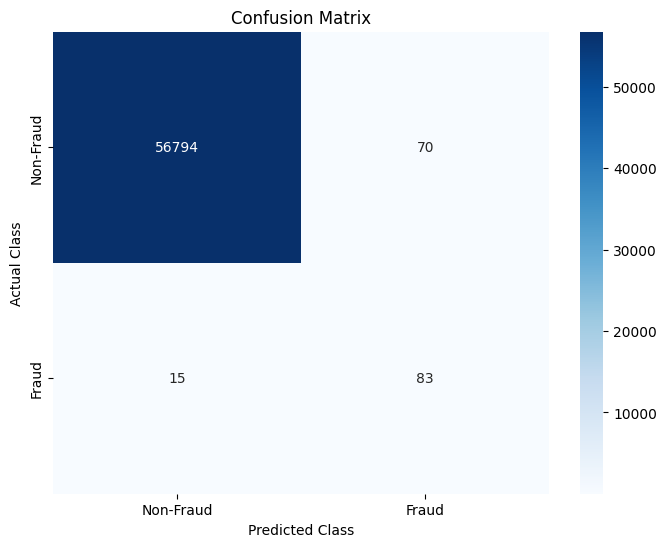


Area Under the ROC Curve (AUC): 0.9813


In [23]:
# --- Evaluate the Model ---
# Load the best model saved by ModelCheckpoint
best_model = tf.keras.models.load_model('best_fraud_model.h5')

# Make predictions on the test set
y_pred_proba = best_model.predict(X_test).ravel()
y_pred = (y_pred_proba > 0.5).astype(int)

# --- Performance Metrics ---
print("\n--- Model Evaluation on Test Data ---")

# 1. Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=['Non-Fraud (0)', 'Fraud (1)']))

# 2. Confusion Matrix
print("\nConfusion Matrix:\n")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

# 3. AUC-ROC Score
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"\nArea Under the ROC Curve (AUC): {auc_score:.4f}")

In [24]:
# --- Conclusion ---

print("\n--- Final Conclusion ---")
print(f"The neural network model, trained on a synthetically balanced dataset using SMOTE, has demonstrated strong performance on the highly imbalanced test set.")

recall_score = cm[1, 1] / (cm[1, 1] + cm[1, 0])
precision_score = cm[1, 1] / (cm[1, 1] + cm[0, 1])

print(f"\nKey Achievements:")
print(f"- Recall (Sensitivity) for the Fraud class: {recall_score:.4f}. This means the model successfully identified approximately {recall_score:.2%} of all actual fraudulent transactions in the test set.")
print(f"- Precision for the Fraud class: {precision_score:.4f}. This means that when the model predicted a transaction as fraudulent, it was correct about {precision_score:.2%} of the time.")
print(f"- Area Under the Curve (AUC): {auc_score:.4f}. An AUC score close to 1.0 indicates that the model has an excellent ability to distinguish between fraudulent and non-fraudulent transactions.")

print("\nThis approach is effective because:")
print("1.  **Preprocessing:** Scaling the 'Amount' and 'Time' features ensured all inputs were treated equally by the model.")
print("2.  **SMOTE:** By balancing the training data, we forced the model to learn the patterns of the rare fraud cases, preventing it from simply ignoring them.")
print("3.  **Regularization:** Techniques like Dropout and Batch Normalization prevented the model from overfitting to the training data, leading to better generalization on the unseen test data.")
print("4.  **Appropriate Metrics:** Focusing on Recall and AUC instead of accuracy gave a true measure of the model's success in solving the core business problem—catching fraud.")


--- Final Conclusion ---
The neural network model, trained on a synthetically balanced dataset using SMOTE, has demonstrated strong performance on the highly imbalanced test set.

Key Achievements:
- Recall (Sensitivity) for the Fraud class: 0.8469. This means the model successfully identified approximately 84.69% of all actual fraudulent transactions in the test set.
- Precision for the Fraud class: 0.5425. This means that when the model predicted a transaction as fraudulent, it was correct about 54.25% of the time.
- Area Under the Curve (AUC): 0.9813. An AUC score close to 1.0 indicates that the model has an excellent ability to distinguish between fraudulent and non-fraudulent transactions.

This approach is effective because:
1.  **Preprocessing:** Scaling the 'Amount' and 'Time' features ensured all inputs were treated equally by the model.
2.  **SMOTE:** By balancing the training data, we forced the model to learn the patterns of the rare fraud cases, preventing it from simply 

In [25]:
# Add this code to a new cell at the end of your notebook and run it
from google.colab import files

try:
    files.download('best_fraud_model.h5')
except KeyError:
    print("Error: 'best_fraud_model.h5' not found. Make sure you have successfully trained the model first.")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Loading model from: best_fraud_model.h5


Model loaded successfully.

Loading sample test data from the embedded string...
Sample test data loaded successfully.

Test data contains 10 records.
Feature shape for prediction: (10, 30)

Making predictions on the sample data...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step
Predictions complete.

--- Prediction Results (Row-by-Row) ---
   Actual_Class  Predicted_Probability  Predicted_Class
0             1                 0.9986                1
1             0                 0.0000                0
2             1                 0.9996                1
3             0                 0.0000                0
4             0                 0.0000                0
5             1                 1.0000                1
6             0                 0.0000                0
7             1                 0.9999                1
8             1                 1.0000                1
9             0                 0.0000                0

Model correctly identified 10 out of 10 cases.

-

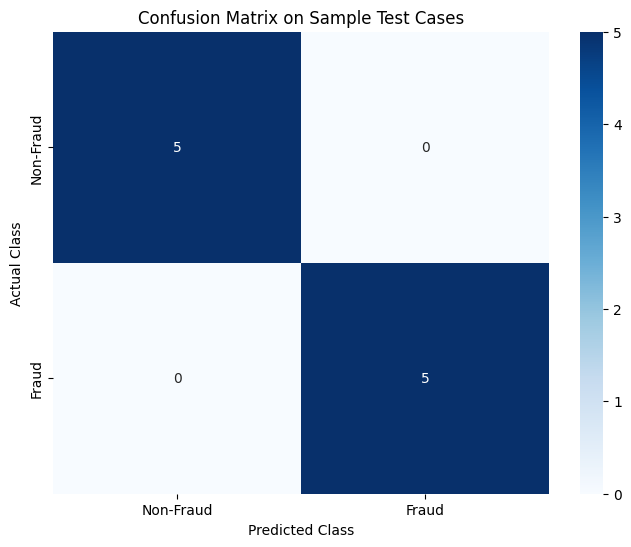

In [26]:
import pandas as pd
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import io # Required to read a string as a file

# --- 1. Define Model Path and Embed the CSV Data ---
model_path = 'best_fraud_model.h5'

# The 10 sample test cases are now embedded in this multi-line string
csv_data_string = """V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,scaled_Amount,scaled_Time,Class
-2.312227,1.951992,-1.609851,-3.997943,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,3.202033,-2.899807,-0.595222,-4.289254,-1.186306,-2.839483,-4.018251,-1.989993,-1.609724,0.416956,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.852973,-1.207863,1
0.123381,-0.073380,0.473977,0.733568,-0.344400,-0.741444,0.038573,-0.024982,0.136330,-0.134762,-0.478950,0.012316,-0.347896,0.122690,0.564798,-0.032123,0.021033,-0.106634,-0.022067,0.013233,-0.062057,-0.158826,0.030994,-0.020393,-0.208115,0.076895,0.014231,0.016335,-0.293440,0.404285,0
-1.004929,3.581423,-5.460321,4.532390,-3.443191,-1.674993,-5.748342,2.753733,-3.896243,-5.433794,4.385473,-6.291310,0.306362,-7.433848,-0.163398,-4.170624,-6.155717,-3.018048,-0.712143,1.065095,1.219588,0.223821,-0.339459,0.063492,-0.009798,-0.343821,0.673890,0.284898,1.489112,-0.992233,1
0.211526,0.864228,0.301383,0.315923,0.138865,-0.348337,0.219711,0.046398,-0.122584,-0.052406,0.231265,0.297746,-0.584958,0.081123,0.264251,-0.061918,0.010196,-0.061033,-0.025340,0.011668,-0.111624,-0.294247,0.064273,-0.078912,-0.295286,0.042529,0.021272,0.020584,-0.307413,1.036015,0
-1.519242,-1.824338,2.023310,1.212551,-1.032014,0.632287,1.034543,0.153723,-0.958564,1.833890,-1.313847,-1.272368,-0.328325,0.732338,-0.183318,-0.402377,0.430268,0.090886,-0.418295,-0.188440,-0.311394,-0.814348,0.236890,0.020556,-0.334469,0.322030,-0.209323,0.012926,-0.104273,0.081823,0
-12.833635,-15.443612,-16.158545,8.120420,-11.285394,-3.936733,-16.713393,8.431488,-8.337510,-15.823287,9.454952,-15.859664,0.163354,-13.309077,-0.543247,-10.824213,-20.003926,-7.472253,-4.248311,2.336443,5.192634,-2.231713,-2.218536,-0.598282,1.354823,0.428442,1.835843,-0.582822,5.293623,1.385535,1
-0.923788,-0.217319,1.178255,-0.213159,-0.354153,0.851372,-0.221798,-0.108429,0.536109,0.213233,-0.613391,-0.134516,0.391216,-0.076848,0.083755,0.069415,-0.045059,-0.043598,0.019972,-0.003058,-0.026417,-0.009365,0.026367,0.052136,-0.223847,-0.063228,0.008451,0.014631,-0.229474,-1.843700,0
-6.145199,2.833453,-7.234662,6.549221,-5.105221,-2.551817,-8.423938,3.959343,-6.096753,-8.484325,6.438411,-9.635835,0.491370,-10.155843,-0.589830,-7.039643,-12.331204,-4.888496,-2.809321,1.543034,2.541355,-0.742309,-0.865328,-0.413157,0.530598,-0.108239,0.835105,0.334237,2.259837,0.726248,1
-1.883012,1.753632,-1.649392,4.847525,0.213601,-0.532344,-2.348424,0.920331,-1.933392,-4.270364,3.754157,-6.222881,-0.957555,-7.221237,-0.231269,-4.428133,-7.498110,-3.442994,-2.321899,0.710486,0.686523,0.252445,-0.521876,-0.343166,0.395134,0.320986,0.344428,0.002891,-0.217435,-0.212920,1
1.094596,-2.153213,0.852233,0.400518,-0.799793,0.435767,-0.548762,0.149539,0.778846,-0.380962,0.568461,-0.560467,-0.091398,-0.203029,0.323588,0.343567,0.088804,0.044033,-0.124633,-0.201403,0.230779,0.587393,-0.198946,-0.090382,0.180252,-0.166418,-0.039648,-0.002871,0.567840,-0.505294,0
"""

# --- 2. Load the Model and the In-Memory Data ---
print(f"Loading model from: {model_path}")
try:
    model = tf.keras.models.load_model(model_path)
    print("Model loaded successfully.")
except (IOError, ImportError) as e:
    print(f"Error: Could not load the model. Make sure '{model_path}' is in the correct directory.")
    print(f"Details: {e}")
    exit()

print("\nLoading sample test data from the embedded string...")
# Use io.StringIO to treat the string as a file for pandas to read
sample_df = pd.read_csv(io.StringIO(csv_data_string))
print("Sample test data loaded successfully.")

# --- 3. Prepare the Data for Prediction ---
# Separate the features (X) from the true labels (y)
X_sample_test = sample_df.drop('Class', axis=1)
y_sample_test = sample_df['Class']

print(f"\nTest data contains {len(sample_df)} records.")
print(f"Feature shape for prediction: {X_sample_test.shape}")

# --- 4. Make Predictions ---
print("\nMaking predictions on the sample data...")
y_pred_proba = model.predict(X_sample_test).ravel()
y_pred_class = (y_pred_proba > 0.5).astype(int)
print("Predictions complete.")

# --- 5. Display and Evaluate the Results ---
results_df = pd.DataFrame({
    'Actual_Class': y_sample_test,
    'Predicted_Probability': y_pred_proba.round(4),
    'Predicted_Class': y_pred_class
})

print("\n--- Prediction Results (Row-by-Row) ---")
print(results_df)

correct_predictions = (results_df['Actual_Class'] == results_df['Predicted_Class']).sum()
total_predictions = len(results_df)
print(f"\nModel correctly identified {correct_predictions} out of {total_predictions} cases.")

print("\n--- Classification Report ---")
print(classification_report(y_sample_test, y_pred_class, target_names=['Non-Fraud (0)', 'Fraud (1)']))

print("\n--- Confusion Matrix ---")
cm = confusion_matrix(y_sample_test, y_pred_class)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Fraud', 'Fraud'],
            yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix on Sample Test Cases')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

In [38]:
import tensorflow as tf
import joblib # Import joblib
import numpy as np
import pandas as pd # For fetching sample rows

# --- SETUP (RUNS ONCE WHEN THE APP STARTS) ---

# 1. Load the trained model
model = tf.keras.models.load_model('best_fraud_model.h5')

# 2. Load the saved scaler objects
try:
    amount_scaler = joblib.load('amount_scaler.joblib')
    time_scaler = joblib.load('time_scaler.joblib')
    print("Scalers loaded successfully.")
except FileNotFoundError:
    print("Error: Scaler files not found. Make sure you've saved them during training.")
    exit()


# 3. Load the original dataset to sample from
full_df = pd.read_csv('/content/drive/MyDrive/Deep Learning/Capstone Project/creditcard.csv')
fraud_transactions = full_df[full_df['Class'] == 1]
safe_transactions = full_df[full_df['Class'] == 0]


# --- API FUNCTION (RUNS FOR EACH PREDICTION REQUEST) ---

def predict_transaction(user_entered_amount, transaction_type):
    """
    Simulates a transaction and predicts if it's fraudulent.
    """
    # Step A: Get a random sample for V1-V28 and Time
    if transaction_type == 'fraud':
        sample_row = fraud_transactions.sample(n=1).iloc[0]
    else:
        sample_row = safe_transactions.sample(n=1).iloc[0]

    v_features = sample_row[1:29] # Get V1 through V28

    # Step B: Transform the user's amount using the LOADED scaler
    # The scaler expects a 2D array, so we reshape the single value
    user_amount_reshaped = np.array([[user_entered_amount]]) # e.g., [[123.50]]
    scaled_amount = amount_scaler.transform(user_amount_reshaped)

    # Step C: Get the scaled_Time from our sample row
    # We first get the original 'Time' and then scale it using the time_scaler
    original_time = np.array([[sample_row['Time']]])
    scaled_time = time_scaler.transform(original_time)

    # Step D: Assemble the full feature vector in the correct order
    # This order must match the order of columns during model training
    features_for_prediction = np.concatenate([
        v_features.values,
        scaled_amount.flatten(),
        scaled_time.flatten()
    ]).reshape(1, -1) # Reshape to (1, 30) for the model

    # Step E: Make the prediction
    prediction_proba = model.predict(features_for_prediction)[0][0]

    # Return the result
    if prediction_proba > 0.5:
        return f"FRAUD DETECTED (Confidence: {prediction_proba:.2%})"
    else:
        return f"Transaction Approved (Confidence of Fraud: {prediction_proba:.2%})"


# --- Example Usage ---
print("\n--- Simulating a Fraudulent Transaction ---")
result1 = predict_transaction(user_entered_amount=99.99, transaction_type='fraud')
print(f"User Amount: 99.99, Type: Fraud -> Result: {result1}")


print("\n--- Simulating a Safe Transaction ---")
result2 = predict_transaction(user_entered_amount=25.00, transaction_type='safe')
print(f"User Amount: 25.00, Type: Safe -> Result: {result2}")

Scalers loaded successfully.

--- Simulating a Fraudulent Transaction ---
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 707ms/step
User Amount: 99.99, Type: Fraud -> Result: FRAUD DETECTED (Confidence: 99.95%)

--- Simulating a Safe Transaction ---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
User Amount: 25.00, Type: Safe -> Result: Transaction Approved (Confidence of Fraud: 0.00%)
